<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/M%C3%B3dulo_11_Implementando_modelos_do_zero_(Regress%C3%A3o_Linear)_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_friedman1, make_classification
from sklearn.metrics import accuracy_score

In [ ]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [ ]:
X, y = getData()
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
X, Xtest, y, ytest = X[:8000], X[8000:], y[:8000], y[8000:]


In [ ]:
X.shape, Xtest.shape, y.shape, ytest.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [ ]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

 Abaixo, Vamos testar diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

In [ ]:
rg = regLinear(learning_rate = 0.025, num_steps = 200)
              

In [ ]:
rg.fit(X, y)

modelo treinado.


In [ ]:
rg.theta_final

array([[4.79148793],
       [4.33410782],
       [4.45739684],
       [0.97830362],
       [6.0770003 ],
       [3.65142527]])

In [ ]:
rg.predict(X)

array([15.80587235, 17.6700742 , 17.02035811, ..., 15.83685161,
       15.03773772, 18.57113846])

Acima, depois de alguns testes a learning_rate de 0.025 foi a escolhida com a melhor combinação de parâmetros.

Comparando com o resultado da regressão linear do scikit-learn:

In [ ]:
lm = LinearRegression()
lm.fit(X, y)
lm.predict(X)

array([16.40508779, 19.28642329, 18.95117161, ..., 16.02972468,
       14.49747016, 20.16268101])

__Os resultados são bem parecidos entre a classe implementada com a classe do scikit-learn__

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>

In [ ]:
#criando dados não lineares

def geraDados():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    X = np.sort(X.reshape(-1,)).reshape(-1,1)
    y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    return X, y

In [ ]:
X, y = geraDados()
X.shape, y.shape

((100, 1), (100, 1))

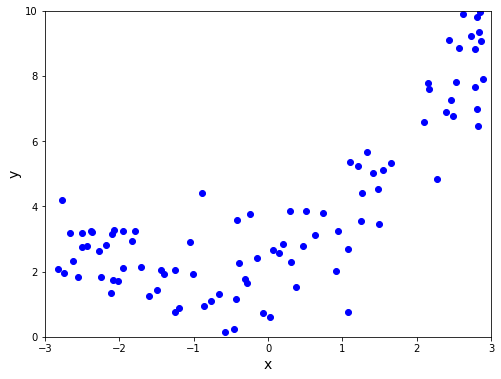

In [ ]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c = "blue")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Acima, vemos que não temos uma relação linear

<br>

Abaixo, vamos fitar uma regressão liner nos dados e ver os resultados.

In [ ]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

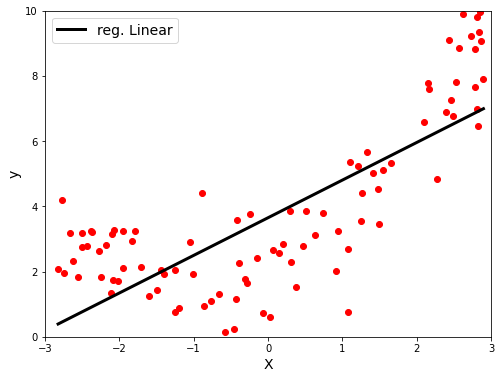

In [ ]:
plt.figure(figsize = [8,6])
plt.scatter(X, y, c = 'red')
plt.plot(X, lm.predict(X), c = 'black', lw = 3, label = 'reg. Linear')
plt.legend(fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.axis([-3, 3, 0, 10])
plt.show()

Acima, vemos que a reta não descreve os dados de uma forma precisa, está sofrendo de underfitting.

<br>

A curva representada no grafico é uma parabola um polinômio de grau 2 

<br>

Abaixo, vamos criar um polinômio de grau 2 do scikit-learn para fitar os dados.

In [ ]:
#importando a função
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#criando uma função polinomial de ordem 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X.shape

(100, 1)

In [ ]:
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

Abaixo, verificando se a coluna de X foi elevada ao quadrado.

In [ ]:
X_poly[:10]

array([[-2.82152488,  7.96100263],
       [-2.77242726,  7.68635293],
       [-2.74889133,  7.55640354],
       [-2.66422874,  7.0981148 ],
       [-2.61858085,  6.85696569],
       [-2.5602114 ,  6.55468241],
       [-2.50345214,  6.26727261],
       [-2.49841951,  6.24210004],
       [-2.43371162,  5.92295223],
       [-2.37630681,  5.64683406]])

In [ ]:
np.c_[X[:10], X[:10]**2]

array([[-2.82152488,  7.96100263],
       [-2.77242726,  7.68635293],
       [-2.74889133,  7.55640354],
       [-2.66422874,  7.0981148 ],
       [-2.61858085,  6.85696569],
       [-2.5602114 ,  6.55468241],
       [-2.50345214,  6.26727261],
       [-2.49841951,  6.24210004],
       [-2.43371162,  5.92295223],
       [-2.37630681,  5.64683406]])

In [ ]:
poly_fit = LinearRegression()
poly_fit.fit(X_poly, y)

print(poly_fit.intercept_)
print(poly_fit.coef_)

[1.93686432]
[[1.00186041 0.52574727]]


Acima, modelamos y sendo:

### $y = \theta_0 + \theta_1 \cdot X + \theta_2 \cdot X^2$,

ou seja, um polinômio de grau(ordem) 2.

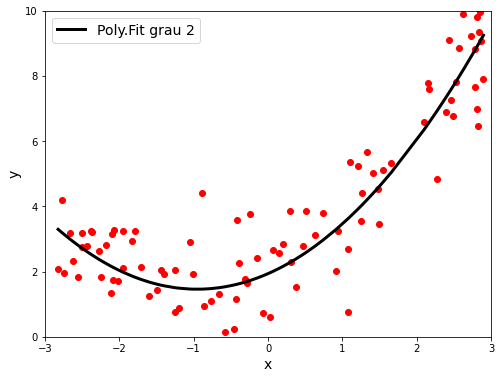

In [ ]:
y_new = poly_fit.predict(X_poly)

plt.figure(figsize=[8,6])
plt.scatter(X, y, c = 'red')
plt.plot(X, y_new, 'black', linewidth=3, label='Poly.Fit grau 2')
plt.legend(fontsize = 14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Acima, temos a curva que esse polinômio aprendeu, vemos que a descrição dos dados é muito melhor!

__Comparando os resultados visualmente:__

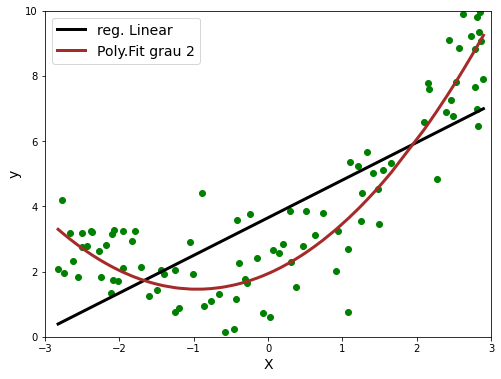

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(X, lm.predict(X), c = 'black', lw = 3, label = 'reg. Linear')
plt.scatter(X, y, c = 'green')
plt.plot(X, y_new, 'brown', lw = 3, label = 'Poly.Fit grau 2')
plt.legend(fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.axis([-3, 3, 0, 10])
plt.show()

O polinômia de grau 2 fitou os dados muito melhor!!


Vamos testar graus maiores.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def polyFit(X, y, grau):

    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    #criando um pipeline
    polynomial_regression = Pipeline([
             ('poly_features', polybig_features),
             ('std_scaler', std_scaler),
             ('ling_reg', lin_reg),                         
       ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

grau: 1


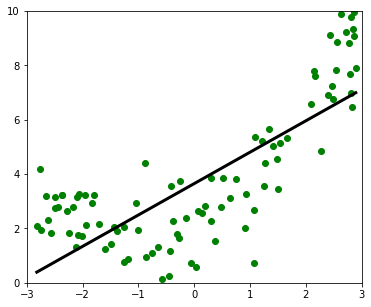

RMSE
1.84574825019826
-----------------------


grau: 2


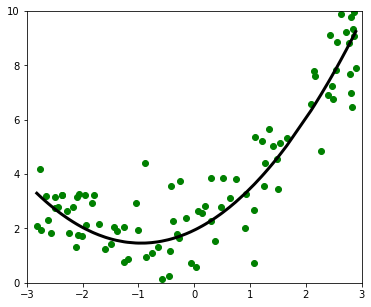

RMSE
1.1274342957952526
-----------------------


grau: 20


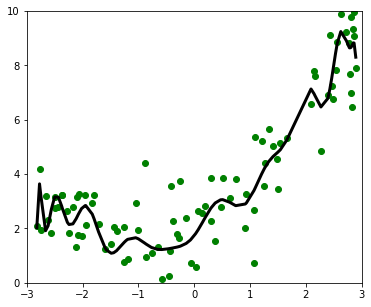

RMSE
1.0456294927499172
-----------------------


grau: 300


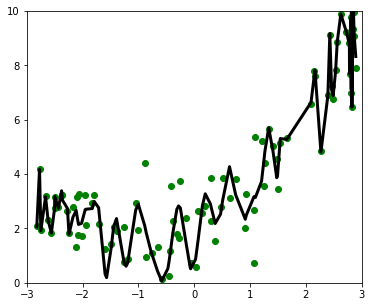

RMSE
0.739250954479048
-----------------------




In [ ]:
for grau in [1,2,20,300]:
  
    print('grau:', grau)

    polyfit = polyFit(X, y, grau)

    ypoly = polyfit.predict(X)

    plt.figure(figsize = [6,5])
    plt.plot(X, ypoly, label = str(grau), lw = 3, c = 'black')
    plt.scatter(X, y, c = 'green')
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print('RMSE')
    print(np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print('-----------------------\n\n')

Analisando apenas o erro nos dados de treino, vemos que o RMSE tende a diminuir a medida que usamos polinômios de graus mais altos. Agora vamos analisar nos dados de teste e verificar se estamos sofrendo de overfitting.

In [ ]:
Xtest, ytest = geraDados()

grau:  1


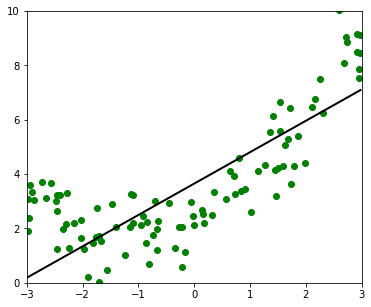

RMSE:
TREINO: 1.84574825019826
TESTE: 1.5040403245750076
------------------------------------------------


grau:  2


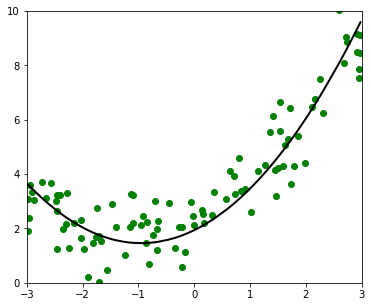

RMSE:
TREINO: 1.1274342957952526
TESTE: 0.910023306874846
------------------------------------------------


grau:  20


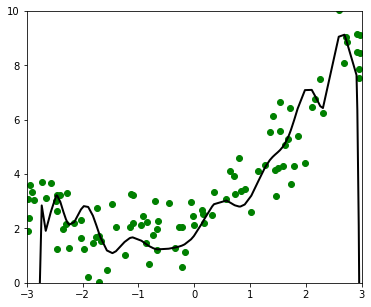

RMSE:
TREINO: 1.0456294927499172
TESTE: 39.72631696985755
------------------------------------------------


grau:  300


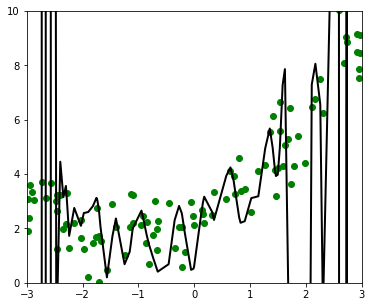

RMSE:
TREINO: 0.739250954479048
TESTE: 6.188842335175805e+16
------------------------------------------------




In [ ]:
for grau in [1,2,20,300]:
    
    print("grau: ", grau)
    
    polyfit = polyFit(X, y, grau)
    
    ypoly_test = polyfit.predict(Xtest)
    
    plt.figure(figsize=[6,5])
    plt.plot(Xtest, ypoly_test, label=str(grau), lw=2, c = 'black')
    plt.scatter(Xtest, ytest, c = 'green')
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print('RMSE:')
    print('TREINO:', np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print('TESTE:', np.sqrt(np.mean(np.square(ytest - polyfit.predict(Xtest)))))
    print('------------------------------------------------\n\n')

__Conclusão:__

Polinômios de ordens altas acabam __overfitando__ os dados!

No entanto, o __polinômio de grau 2 obteve o melhor valor:__ obteve um RMSE em treino e conseguiu generalizar bem os dados.

Agora vamos controlar o overffitting com a técnica de __REGULARIZAÇÃO!__

Vamos usar a regularização Ridge na função de custo RMSE, ao treinarmos o modelo com a regularização, o objetivo é minimizar a função de custo.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
def polyFitReg(X, y, grau, base_model, base_model_name):
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    basemodel = base_model
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            (base_model_name, base_model),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

Rigde_ alpha: 0


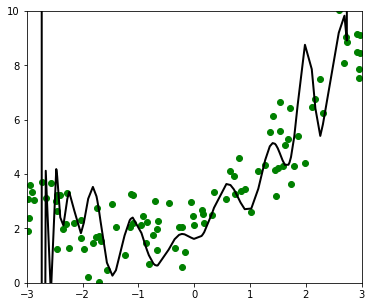

RMSE
TREINO: 1.0570970844272207
TESTE: 401098084.5486454
--------------------------------------------


Rigde_ alpha: 0.001


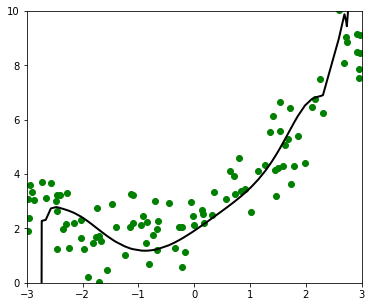

RMSE
TREINO: 1.065985599531747
TESTE: 22254.000973862938
--------------------------------------------


Rigde_ alpha: 0.01


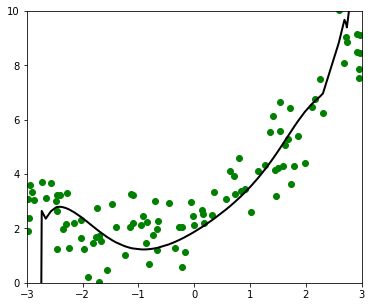

RMSE
TREINO: 1.0719472685087517
TESTE: 5746.055375493597
--------------------------------------------


Rigde_ alpha: 0.1


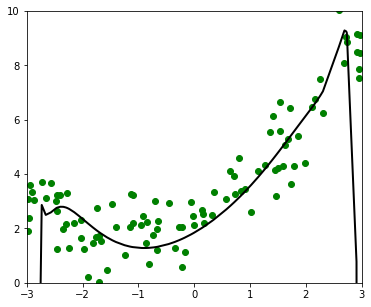

RMSE
TREINO: 1.0802827823790315
TESTE: 1386.537478958992
--------------------------------------------


Rigde_ alpha: 1


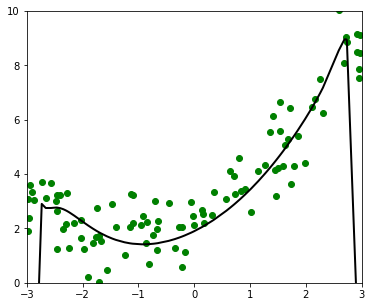

RMSE
TREINO: 1.0918528022733327
TESTE: 537.9309367694218
--------------------------------------------


Rigde_ alpha: 10


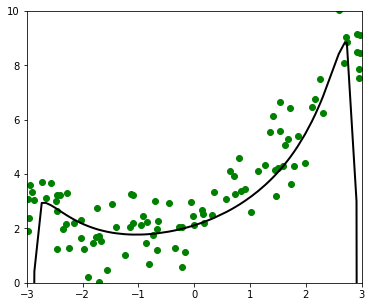

RMSE
TREINO: 1.1475008420842043
TESTE: 196.52592555187923
--------------------------------------------


Rigde_ alpha: 100


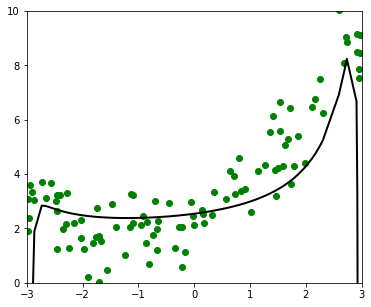

RMSE
TREINO: 1.4244490556410883
TESTE: 28.194956195621998
--------------------------------------------




In [ ]:
grau = 200

for alpha in [0, 0.001, 0.01, 0.1, 1, 10, 100]:

    model_name = 'Rigde_ alpha: '+str(alpha)
    polyfit = polyFitReg(X,
                         y,
                         grau,
                         base_model = Ridge(alpha = alpha),
                         base_model_name = model_name)
    
    ypoly_test = polyfit.predict(Xtest)

    print(model_name)
    plt.figure(figsize = [6,5])
    plt.plot(Xtest, ypoly_test, label = str(grau), lw = 2, c = 'black')
    plt.scatter(Xtest, ytest, c = 'green')
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print('RMSE')
    print('TREINO:', np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print('TESTE:', np.sqrt(np.mean(np.square(ytest - polyfit.predict(Xtest)))))
    print('--------------------------------------------\n\n')

__Conclusão:__

__Usando polinômios de grau 200 (grau muito alto!) conseguimos ter resultados bons, por exemplo ao usarmos a = 1.__

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    


In [ ]:
#classe regLogistica

class regLogistica():
    
    def __init__(self, learning_rate, num_steps, limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar = limiar
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
#        print("modelo treinado.")

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        pred_sigmoid = 1 / (1 + np.exp(-preds))
        pred_final = np.where(pred_sigmoid > limiar, 1, 0)
        return pred_final.reshape(-1,)


    def predict_prob(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        pred_sigmoid = 1 / (1 + np.exp(-preds))
        return pred_sigmoid.reshape(-1,)       

__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [ ]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [ ]:
X, y = getData2()
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
Xtrain, Xtest, ytrain, ytest = X[:7000], X[7000:], y[:7000], y[7000:]
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((7000, 5), (3000, 5), (7000,), (3000,))

In [ ]:
learning_rate = [0.25, 0.75, 0.1, 2]
num_steps = [5, 10, 20, 50, 200]
limiar = [0.5]

for lr in learning_rate:
    for ns in num_steps:
        for lim in limiar:
            reglog = regLogistica(learning_rate = lr, num_steps = ns, limiar = lim)
            print('Learning Rate: ', lr)
            print('num_steps', ns)
            print('Limiar', lim)
            reglog.fit(Xtrain, ytrain)
            print('Accuracy Score treino: ', accuracy_score(y_true = ytrain, y_pred = reglog.predict(Xtrain))) 
            print('Accuracy Score teste: ', accuracy_score(y_true = ytest, y_pred = reglog.predict(Xtest)))
            print()
            print('------------------------------------------------------\n\n')


Learning Rate:  0.25
num_steps 5
Limiar 0.5
Accuracy Score treino:  0.563
Accuracy Score teste:  0.5646666666666667

------------------------------------------------------


Learning Rate:  0.25
num_steps 10
Limiar 0.5
Accuracy Score treino:  0.5737142857142857
Accuracy Score teste:  0.5753333333333334

------------------------------------------------------


Learning Rate:  0.25
num_steps 20
Limiar 0.5
Accuracy Score treino:  0.5725714285714286
Accuracy Score teste:  0.574

------------------------------------------------------


Learning Rate:  0.25
num_steps 50
Limiar 0.5
Accuracy Score treino:  0.5725714285714286
Accuracy Score teste:  0.574

------------------------------------------------------


Learning Rate:  0.25
num_steps 200
Limiar 0.5
Accuracy Score treino:  0.5725714285714286
Accuracy Score teste:  0.574

------------------------------------------------------


Learning Rate:  0.75
num_steps 5
Limiar 0.5
Accuracy Score treino:  0.20457142857142857
Accuracy Score teste:  0

Comparando com o resultado da regressão logística do scikit-learn:

In [ ]:
logreg = LogisticRegression()


In [ ]:
logreg.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.predict(Xtrain)[0:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
ytrain[0:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
logreg.predict_proba(Xtrain)[0:10]

array([[0.44466564, 0.55533436],
       [0.68322865, 0.31677135],
       [0.06632229, 0.93367771],
       [0.92877468, 0.07122532],
       [0.98838432, 0.01161568],
       [0.09410805, 0.90589195],
       [0.02691509, 0.97308491],
       [0.87841507, 0.12158493],
       [0.27371975, 0.72628025],
       [0.78532319, 0.21467681]])

__Conclusão final:__

__Os resultados do scikit-learn são melhores do que da classe implementada.__